# Project: `Unemployment Data Analysis`
### By `Kelvin Kimani`

## Introduction
> - Generally, the term `Unemployment` refers to the state of an employable individual actively seeking a job and failing to secure an appropriate employment opportunity.
> - The `Unemployment rate` is obtained by dividing the `number of unemployed individuals` by the `total number of people in the workforce`.
> - The Unemployment dataset contains information about the unemployment rates for 31 years, that is, from 1991 to 2021, from all countries world wide.
### Columns in the dataset
> - `Country Name:` The name of the country
> - `Country code:` This column contains the codes for the country indicated in the `country name` column.
> - `Years (1991 to 2021):` Each of these columns holds the umemployment rates of the respective countries.

## Preliminary setup

### Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import getpass

from os import system

%matplotlib inline

### Unzip the data.

In [2]:
## Create a function for unzipping the ziped files.
def unzip(filePath, destinationFolder):
    import zipfile
    with zipfile.ZipFile(filePath, 'r') as myData:
        myData.extractall(destinationFolder)

## Call the function and unzip the required file.
unzip('Dataset/archive.zip', 'Dataset')

### Edit pandas set_up options to dislay all columns & Rows without breaking the output

In [3]:
# This makes it easier to visually assess the data.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load the dataset

In [4]:
df = pd.read_csv('Dataset/unemployment analysis.csv')

In [5]:
df.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,7.79,7.72,7.73,7.96,7.79,7.31,7.12,6.99,6.74,6.27,6.32,6.87,6.75,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,10.81,10.81,11.26,11.14,10.99,11.22,11.10,11.30,11.09,11.31,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,4.86,4.92,4.87,4.78,4.75,4.73,4.73,4.65,4.63,4.60,4.58,4.55,4.55,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,4.05,4.03,4.00,3.96,3.96,3.92,3.88,3.86,3.82,3.79,3.78,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,20.84,19.03,18.58,17.90,16.99,16.31,15.97,15.63,15.97,13.06,13.67,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


## Data Cleaning

In [6]:
# Check if the dataset has duplicated records
df.duplicated().sum()

0

In [7]:
# Check if the dataset has null entries
df.isnull().sum()

Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [8]:
# Check if every column holds the correct datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

In [9]:
# Check whether the column headers
df.columns

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [10]:
# Display the entire dataset for visual assessment
df

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,7.79,7.72,7.73,7.96,7.79,7.31,7.12,6.99,6.74,6.27,6.32,6.87,6.75,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,10.81,10.81,11.26,11.14,10.99,11.22,11.10,11.30,11.09,11.31,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,4.86,4.92,4.87,4.78,4.75,4.73,4.73,4.65,4.63,4.60,4.58,4.55,4.55,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,4.05,4.03,4.00,3.96,3.96,3.92,3.88,3.86,3.82,3.79,3.78,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,20.84,19.03,18.58,17.90,16.99,16.31,15.97,15.63,15.97,13.06,13.67,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
5,Arab World,ARB,11.62,12.12,12.86,12.95,13.32,12.38,11.95,11.97,12.11,12.60,12.47,12.47,12.39,11.35,11.20,10.43,10.03,9.72,9.33,9.40,10.48,10.66,10.74,10.87,10.97,10.76,10.90,10.50,10.01,11.49,11.63
6,United Arab Emirates,ARE,1.87,1.84,1.85,1.81,1.80,1.90,1.98,2.14,2.22,2.25,2.49,2.65,2.75,2.91,3.12,2.94,2.87,2.74,2.68,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
7,Argentina,ARG,5.44,6.36,10.10,11.76,18.80,17.11,14.82,12.65,14.05,15.00,17.32,19.59,15.36,13.52,11.51,10.08,8.47,7.84,8.65,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
8,Armenia,ARM,1.60,1.80,5.30,6.60,6.70,9.30,10.80,9.40,11.20,11.05,10.91,10.78,10.59,10.34,10.20,10.00,9.81,14.39,18.44,19.01,18.44,17.30,16.18,17.50,18.26,17.62,17.70,18.97,18.30,21.21,20.90
9,Australia,AUS,9.58,10.73,10.87,9.72,8.47,8.51,8.36,7.68,6.87,6.28,6.74,6.37,5.93,5.39,5.03,4.78,4.38,4.23,5.56,5.21,5.08,5.22,5.66,6.08,6.05,5.71,5.59,5.30,5.16,6.46,5.11


### Cleaning Remarks
1. The dataset has no duplicated values
2. The dataset has no null entries
3. All the columns containing the yearly unemployment rates have the datatype set to `float` while the `country name`and `country code` are saved as string objects as required.
4. Replace the `space` between names in the column headers with an underscore `_`

#### Replace the space between the column names with an underscore

In [11]:
df.columns = df.columns.str.replace(' ', '_')

In [12]:
# Verify that the spaces in the column names have been replaced with underscores successfully.
df.columns

Index(['Country_Name', 'Country_Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

## Data Exploration

In [13]:
df.sample(5)

,Country_Name,Country_Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
53,East Asia & Pacific (excluding high income),EAP,2.40,2.36,2.61,2.91,2.99,3.10,3.20,3.37,3.45,3.41,3.83,4.15,4.40,4.39,4.46,4.36,4.34,4.42,4.39,4.15,4.10,4.03,4.04,4.03,4.10,4.02,3.91,3.79,3.90,4.39,4.29
97,"Iran, Islamic Rep.",IRN,11.10,10.83,10.44,10.05,9.57,9.10,9.78,10.38,11.02,11.57,12.28,12.80,11.51,10.30,11.81,11.52,10.77,10.63,12.11,13.68,12.49,12.27,10.60,10.68,11.17,12.62,12.23,12.19,10.74,12.17,11.46
67,Finland,FIN,6.50,11.60,16.20,16.43,17.00,15.57,14.97,13.21,11.69,11.13,10.29,10.42,10.47,10.36,8.38,7.72,6.85,6.37,8.25,8.39,7.78,7.69,8.19,8.66,9.38,8.82,8.64,7.36,6.69,7.76,7.53
219,Ukraine,UKR,1.90,1.90,2.00,2.00,5.62,7.65,8.93,11.32,11.86,11.71,11.06,10.14,9.06,8.59,7.18,6.81,6.35,6.36,8.84,8.10,7.85,7.53,7.17,9.27,9.14,9.35,9.50,8.80,8.19,9.13,8.88
220,Upper middle income,UMC,3.82,3.87,4.19,4.62,5.01,5.18,5.34,5.61,5.76,5.52,5.77,6.05,6.22,6.01,5.93,5.70,5.45,5.49,5.99,5.67,5.54,5.48,5.49,5.49,5.66,5.90,5.93,5.77,6.00,6.76,6.76


### How are the global unemployment rates distributed yearly?

In [14]:
# Generate summary statistics of every numerical column in the dataset
df.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.00000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,7.278000,7.626340,8.070766,8.246043,8.333915,8.494894,8.394043,8.441064,8.568043,8.438979,8.422213,8.593277,8.550723,8.341702,8.121872,7.710511,7.330340,7.204170,7.944426,8.105149,8.04183,8.062553,8.086468,7.924340,7.818426,7.720979,7.485404,7.247404,7.087362,8.278809,8.219660
std,6.013749,6.296617,6.335855,6.243778,6.330822,6.358431,6.206845,6.133045,6.088361,6.126318,6.150849,6.267334,6.150499,6.006911,5.904257,5.679433,5.471499,5.276742,5.402894,5.648686,5.67518,5.780173,5.832019,5.699899,5.574759,5.456333,5.318381,5.240429,5.129146,5.470319,5.506914
min,0.300000,0.340000,0.410000,0.470000,0.500000,0.560000,0.540000,0.560000,0.570000,0.580000,0.560000,0.550000,0.590000,0.610000,0.590000,0.580000,0.400000,0.310000,0.310000,0.450000,0.32000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,2.945000,3.140000,3.700000,3.890000,3.945000,3.995000,4.020000,4.085000,4.275000,4.070000,4.005000,4.240000,4.470000,4.415000,4.445000,4.185000,4.025000,3.990000,4.460000,4.295000,4.27000,4.090000,4.245000,4.200000,4.315000,4.310000,4.075000,3.875000,3.805000,4.620000,4.750000
50%,5.410000,5.710000,6.030000,6.550000,6.700000,7.050000,6.930000,6.890000,6.690000,6.530000,6.390000,6.770000,6.690000,6.510000,6.670000,6.140000,5.770000,5.790000,6.410000,6.840000,6.50000,6.450000,6.290000,6.150000,6.080000,6.010000,5.800000,5.620000,5.530000,6.800000,6.580000
75%,9.815000,10.170000,10.895000,11.110000,11.050000,11.405000,11.090000,11.500000,11.845000,11.565000,11.180000,11.150000,11.075000,10.635000,10.370000,9.535000,8.930000,8.625000,9.745000,10.270000,10.41500,10.655000,10.465000,10.290000,10.080000,9.895000,9.445000,9.060000,8.605000,10.230000,10.245000
max,36.120000,36.390000,36.740000,36.980000,37.340000,38.800000,37.940000,37.160000,36.350000,35.460000,34.630000,33.860000,36.690000,37.160000,37.250000,36.030000,34.930000,33.760000,32.180000,32.020000,31.38000,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


#### A guide of how to interpret the summary statistics in the table above.
> - `std`: The standard deviation of the global unemployment rate for the respective year.
> - `min`: The Minimum global unemployment rate for the respective year
> - `25%`: This is the value which 25% of the global unemployment rates fall below. In other words, this is the `lower quartile` of the global unemployment rates for the respective years.
> - `50%`: This is the value which 50% of the global unemployment rates fall below. In other words, this is the `median` of the global unemployment rates for the respective years.
> - `75%`: This is the value which 25% of the global unemployment rates fall above. In other words, this is the `upper quartile` of the global unemployment rates for the respective years.
> - `max`: The Maximum global unemployment rate for the respective year.

#### To get more insight about the descriptive summary of the unemployment rates of the respective years, it would be more elegant to visualize the data using box plots.

> Since we will be generating multiple boxplots, to make the code cleaner, it is elegant to create a function that can be called to generate the boxplots.

In [15]:
# Create the boxplot function


In [16]:
def boxplot(x_size, y_size, color, data, rotation):
    '''
    A function for generating Boxplots.
    Inputs:
        x_size: The size of the x dimension of the figure to be generated
        y_size: The size of the y dimension of the figure to be generated
        color: The index of the color to be selected from the seaborn color palette
        data: The dataset to be referenced when generating the plot
        rotation: The degree of rotating the xtick lables.
    Output:
        A boxplot/boxplots of the data in question.
        
    '''
    # Set the grid
    sns.set_theme(style='whitegrid')

    # Set the figure size
    plt.figure(figsize=(x_size,y_size))

    #Select a color from the seaborn color palette
    plot_color = sns.color_palette()[color]

    # Generate the box plots
    sns.boxplot(data=df, color=plot_color)

    # Prompt for the title
    title = input('Please enter the title of the boxplot: ')
    plt.title(title, fontsize = 14, weight='bold')

    # Prompt for the x label
    x_label = input('Please enter the x Lable: ')
    plt.xlabel(x_label, fontsize=10, weight='bold')

    # Prompt for the y label
    y_label = input('Please enter the y Lable: ')
    plt.ylabel(y_label, fontsize=10, weight='bold')

    # Rotate the tick labels
    plt.xticks(rotation=rotation);

Please enter the title of the boxplot: Box plots of unemployment rates by year
Please enter the x Lable: year
Please enter the y Lable: unemployment rate


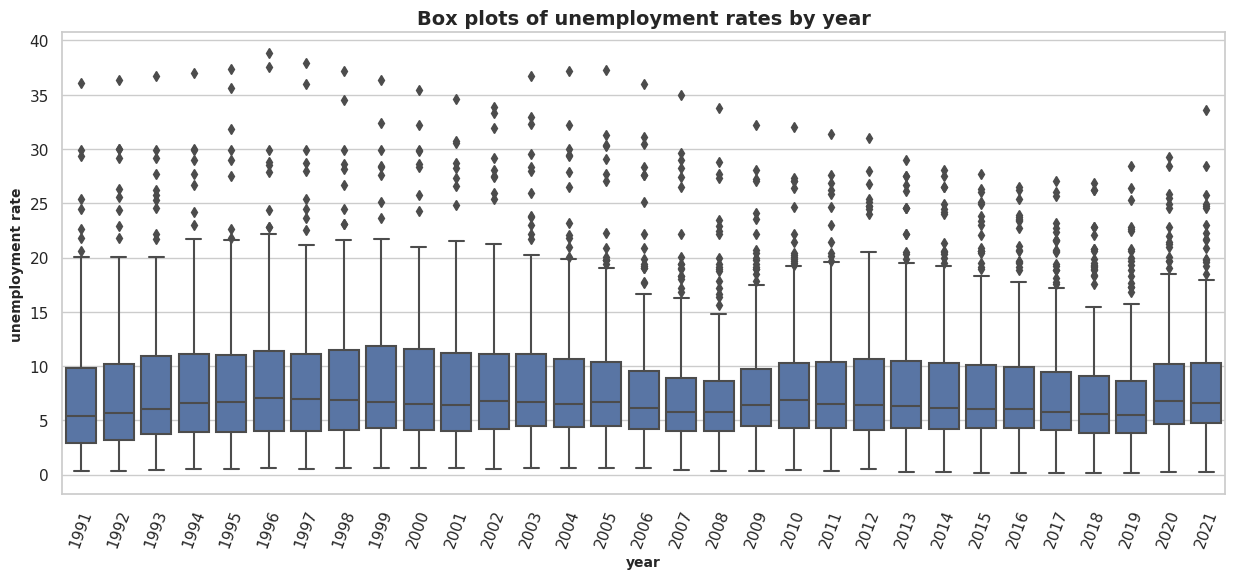

In [17]:
# Call the boxplot function to generate a boxplot of unemployment rates by year.
boxplot(15, 6, 0, df, 70)

# Paste the following text when prompted.
# Title: 'Box plots of unemployment rates by year'
# x_label: 'year'
# y_label: 'unemployment rate'

> The Figure above clearly visualizes the five number summary (`Minimum`, `Maximum`, `First quartile`, `Second quartile (Median)`, and the `Third Quartile`), of the unemployment rates over the years.

In [18]:
df.columns

Index(['Country_Name', 'Country_Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [19]:
# Find the mean 
# df.loc[:, df.columns != ('Country_Code')].mean()
df.mean()

/tmp/ipykernel_6361/2126543886.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


1991    7.278000
1992    7.626340
1993    8.070766
1994    8.246043
1995    8.333915
1996    8.494894
1997    8.394043
1998    8.441064
1999    8.568043
2000    8.438979
2001    8.422213
2002    8.593277
2003    8.550723
2004    8.341702
2005    8.121872
2006    7.710511
2007    7.330340
2008    7.204170
2009    7.944426
2010    8.105149
2011    8.041830
2012    8.062553
2013    8.086468
2014    7.924340
2015    7.818426
2016    7.720979
2017    7.485404
2018    7.247404
2019    7.087362
2020    8.278809
2021    8.219660
dtype: float64